In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
from torch import nn
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
from speech_dataset import *
from models import ConvBiLSTM

In [4]:
train_dataset, test_dataset = load_torch_dataset()

In [5]:
train_dataloader = DataLoader(train_dataset, batch_size=32)

In [6]:
model = ConvBiLSTM()

In [13]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

In [8]:
losses = []

In [16]:
model.train()

for i in range(10):
    epoch_loss = 0
    b = 0

    for X, Y in train_dataloader:
        optimizer.zero_grad()
        preds = model(X)
        loss = loss_fn(preds.view(-1, 2), Y.view(-1))

        if b % 5 == 0:
            print(f"b={b+1:02d}: {loss.item()}")
    
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        b += 1

    epoch_loss = epoch_loss / len(train_dataset)
    losses.append(epoch_loss)

    print(f"==== Epoch {i+1}: train_loss={epoch_loss:.10f}")

print("Done")

b=01: 0.6685977578163147
b=06: 0.6530349254608154
b=11: 0.7628759145736694
==== Epoch 1: train_loss=0.0233247219
b=01: 0.6661743521690369
b=06: 0.6578476428985596
b=11: 0.7683785557746887
==== Epoch 2: train_loss=0.0233817050
b=01: 0.6686812043190002
b=06: 0.655614972114563
b=11: 0.7680790424346924
==== Epoch 3: train_loss=0.0233202027
b=01: 0.6749289631843567
b=06: 0.65628981590271
b=11: 0.7689387798309326
==== Epoch 4: train_loss=0.0233214547
b=01: 0.6643514037132263
b=06: 0.6545087099075317
b=11: 0.7659794092178345
==== Epoch 5: train_loss=0.0233145747
b=01: 0.6653234362602234
b=06: 0.6520327925682068
b=11: 0.7576408386230469
==== Epoch 6: train_loss=0.0233018863
b=01: 0.6684706807136536
b=06: 0.656864583492279
b=11: 0.7639092803001404
==== Epoch 7: train_loss=0.0233030612
b=01: 0.6692251563072205
b=06: 0.6548153162002563
b=11: 0.7663909196853638
==== Epoch 8: train_loss=0.0233084776
b=01: 0.6625622510910034
b=06: 0.6576329469680786
b=11: 0.7747465968132019
==== Epoch 9: train_loss=

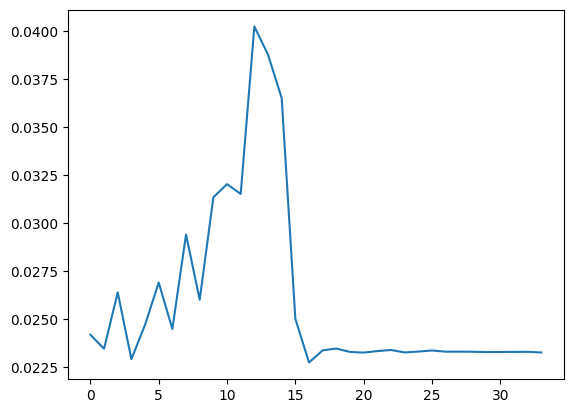

In [17]:
plt.plot(losses)

In [18]:
# torch.save({'model_state': model.state_dict()},'checkpoints/model_001.chk')

In [ ]:
# checkpoint = torch.load('checkpoints/model1_003.chk')
# model.load_state_dict(checkpoint['model_state'])